## EDA

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('dataset.csv')

/home/eugenio/ITBA/An_Ciudades/venvCiudades/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
df.head()

,periodo,concepto,tipo_prestacion,comuna,barrio,year,month
0,201701,REPARACION DE VEREDA,SOLICITUD,COMUNA 5,BOEDO,2017,1
1,201701,INCONVENIENTES CON ECOBICIS,QUEJA,COMUNA 4,BOCA,2017,1
2,201701,INCONVENIENTES CON ECOBICIS,QUEJA,COMUNA 4,BOCA,2017,1
3,201701,INCONVENIENTES CON ECOBICIS,QUEJA,COMUNA 14,PALERMO,2017,1
4,201701,INSTALACION/REPARACION DE CONTENEDOR,SOLICITUD,COMUNA 4,PARQUE PATRICIOS,2017,1


In [33]:
df.year.value_counts()

2018    893291
2017    691878
2020    574435
2021    395661
Name: year, dtype: int64

In [34]:
def extract_year(x):
    return str(x)[0:4]

def extract_month(x):
    return str(x)[4:6]

df['year'] = df.periodo.apply(lambda x: extract_year(x))
df['month'] = df.periodo.apply(lambda x: extract_month(x))

In [35]:
plot_df = df[df['concepto'] == 'VEREDA SUCIA POR MASCOTAS'].groupby(by=['year', 'month']).count()['periodo']
plot_df = plot_df.reset_index()
plot_df.rename(columns = {
    'periodo' : 'quejas'
}, inplace=True)
plot_df.head()

,year,month,quejas
0,2017,01,16
1,2017,02,11
2,2017,03,17
3,2017,04,13
4,2017,05,13


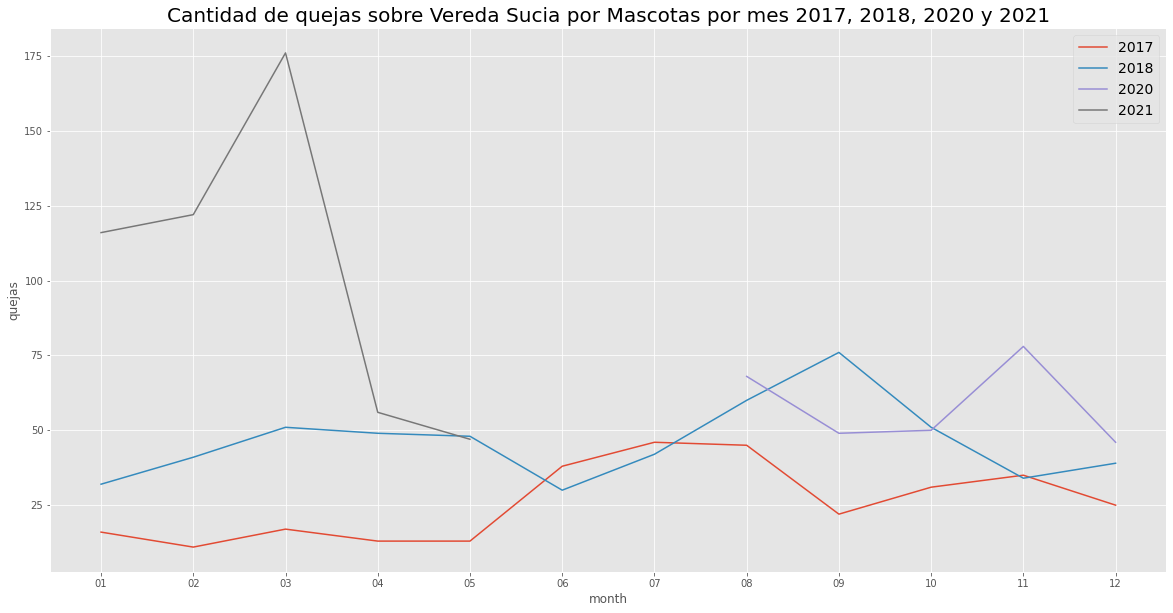

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.style.use('ggplot')

sns.lineplot(data=plot_df, x="month", y="quejas", hue="year")


plt.title('Cantidad de quejas sobre Vereda Sucia por Mascotas por mes 2017, 2018, 2020 y 2021', fontsize=20)
plt.legend(loc='best', fontsize=14)
plt.show()

- El fenomeno no parece presentar estacionalidad mensual.
- Hay una leve tendencia creciente hacia fin de ano.
- Nominalmente el 2021 esta muy por encima de los anos pasados.
- El pico observado fue en Marzo de 2021 y en anos anteriores en septiembre de 2018 y noviembre de 2020.

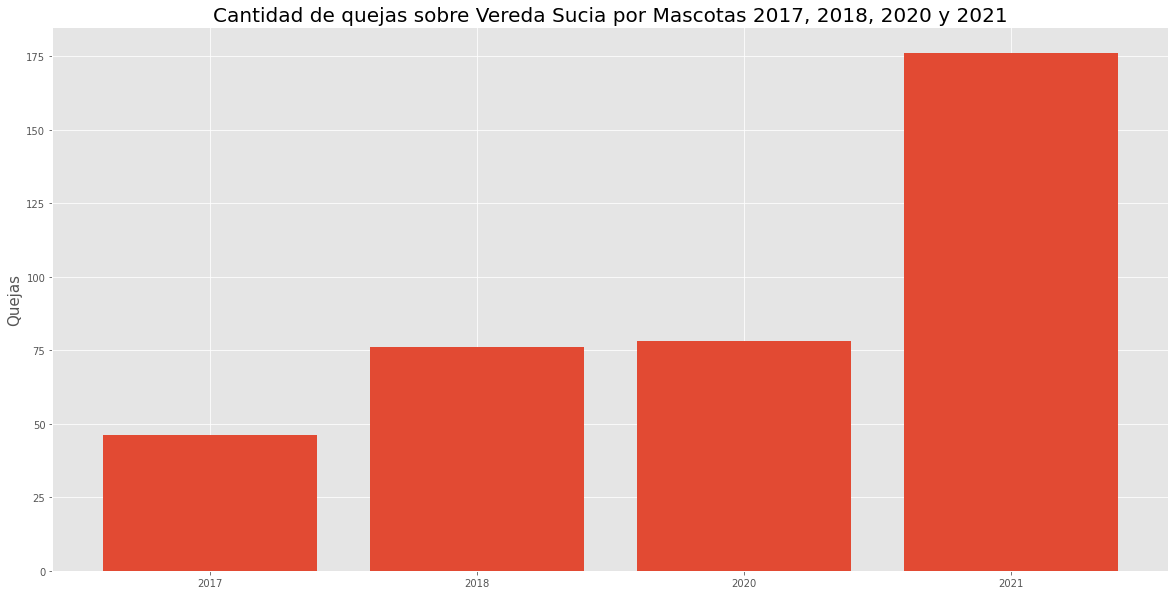

In [37]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.bar(x=plot_df.year, height=plot_df.quejas)

plt.title('Cantidad de quejas sobre Vereda Sucia por Mascotas 2017, 2018, 2020 y 2021', fontsize=20)
#plt.xlabel('Year', fontsize = 15)
plt.ylabel('Quejas', fontsize = 15)
plt.show()

#### En 5 meses, 2021 ya supero los anos anteriores. (Notar que 2020 solo tiene registros de agosto a diciembre) Es un fenomeno que esta creciendo.

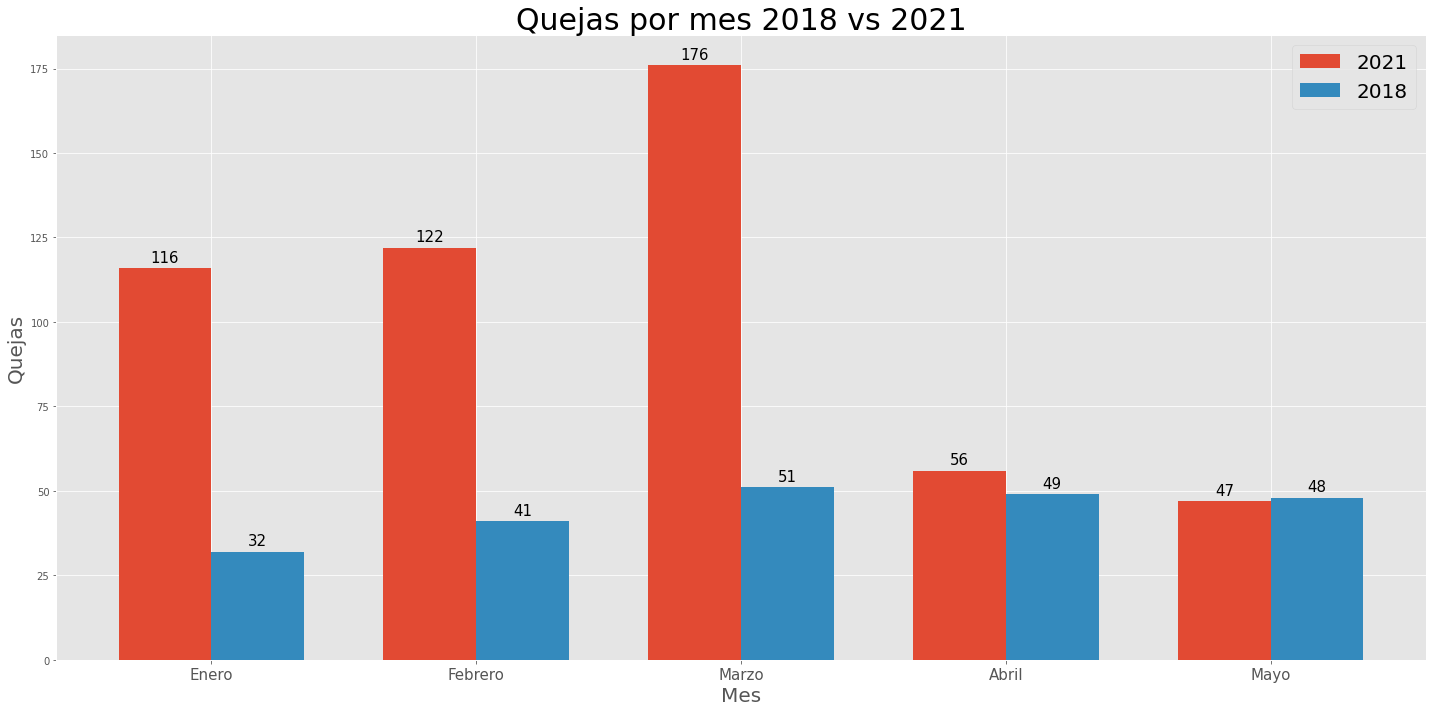

In [38]:
import numpy as np
labels = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo']
data_2021 = plot_df[plot_df['year']=='2021']['quejas'].values
data_2018 = plot_df[plot_df['year']=='2018']['quejas'].values[0:5]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, data_2021, width, label='2021')
rects2 = ax.bar(x + width/2, data_2018, width, label='2018')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quejas', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.set_title('Quejas por mes 2018 vs 2021', fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
ax.legend(loc='best', fontsize=20)

ax.bar_label(rects1, padding=3, fontsize=15)
ax.bar_label(rects2, padding=3, fontsize=15)

fig.tight_layout()

plt.show()

Venia presentando una tendencia creciente y de pronto aflojo. Probablemente por las medidas del gobierno del 08/04. Lo cual indica que no hay que aflojar porque si se liberan las restricciones el problema no solo es mucho mayor que anos anteriores si no que presenta una tendencia creciente mensual.

[Medidas del gobierno](https://www.argentina.gob.ar/coronavirus/medidas-gobierno)

In [39]:
plot_df = df[df['concepto'] == 'VEREDA SUCIA POR MASCOTAS'].groupby(by=['year',
                                                              'month'])['periodo'].count()/df.groupby(by=['year',
                                                                                                          'month'])['periodo'].count()
plot_df = plot_df.reset_index()
plot_df.rename(columns = {
    'periodo' : 'quejas'
}, inplace=True)

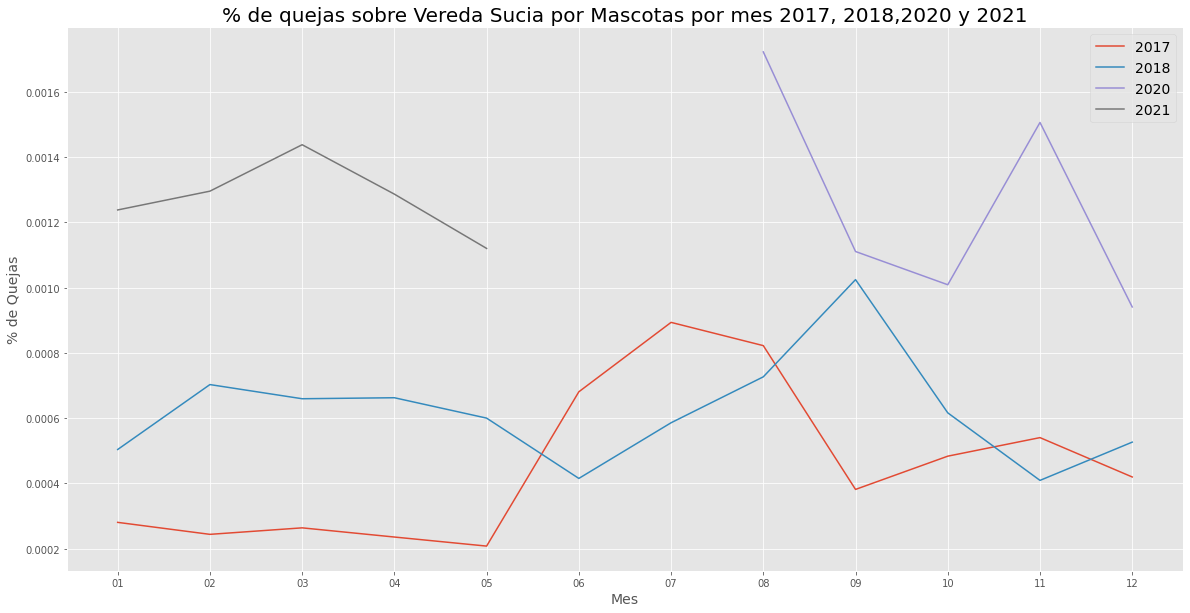

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.style.use('ggplot')

sns.lineplot(data=plot_df, x="month", y="quejas", hue="year")

plt.xlabel('Mes', fontsize=14)
plt.ylabel('% de Quejas', fontsize=14)
plt.title('% de quejas sobre Vereda Sucia por Mascotas por mes 2017, 2018,2020 y 2021', fontsize=20)
plt.legend(loc='best', fontsize=14)

plt.show()

- 2020 esta % por encima de 2017 y 2018 en sus anos de operacion.
- 2021 ya arranca muy arriba de los anos anteoriores presentando valores entre el 0.12 y 0.14 porciento del total de quejas siendo relacionadas a esto.
- El pico observado fue en Agosto del 2020.